Part 0: The Dataset
The trainMobile.csv datataset (taken from kaggle -- https://www.kaggle.com/iabhishekofficial/mobile-
price-classification) contains data about cell phones, using the following features:
battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_widthPixel Resolution Width
ram: Random Access Memory in Mega Bytes
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost)
and 3(very high cost).
The dataset consists of attributes with numeric values. The variable to predict is price_range.
Part 1: Analysis (10 points)
1. How many instances are contained in the dataset? _______ The dataset is complete (i.e. for each
instance, all attribute values are always correctly specified - there are no "missing values")?
values")? _______ Is the dataset balanced with respect to the class to be predicted? _________
(points 1).
2. Does the variable sc_w take discrete or continuous values? Analyze the distribution of values and
check if expensive phones have a larger screen size on average.
Check whether removing items with sc_w equal to 0 changes the result. (points 2)
3. Is it true that on average, less expensive phones also have a less powerful battery?
Realize 4 histograms (one for each price_range value) that represent distribution of battery power values for each category.
of battery power values for each category. (point 3)
4. Check if all phones that have 4G also have 3G (points 2)
5. How many 4G phones do not have wifi and bluetooth? (points 2)Part 2: Transformation and Prediction (20 points)
1. You want to predict the value of price_range based on the attributes in the dataset.
Split the dataset so that 3/4 of the elements are contained in a new dataset "train" and
1/4 in the dataset "test".
To train the train with the model Decision Tree and to estimate the accuracy obtained calculated both on the
train dataset and on the test dataset. Compare the obtained results with those obtained with a
prediction based on the Logistic Regression model. Make some considerations on the results
Make some considerations on the obtained results, taking into account also the confusion matrix analysis. (points 4)
2. Compare the accuracy obtained in the previous step with the accuracy obtained with a
10 Fold cross validation. (1 points)
3. Use the function of gridSearchCV to find the best parameters of the classifier
decision tree. Act on the criterion, max_features and min_samples_split parameters. Check if
the accuracy obtained with the new configuration exceeds the standard accuracy obtained in
point 1 (point 4)
4. Use the MaxAbsScaler function to scale the dataset values between 0 and 1 and compare if
the accuracy obtained with the Decision Tree Classifier improves (steps 3).
5. Discretize the ram value into 4 intervals and see if the accuracy obtained with the
Decision Tree Classifier improves (step 2).
6. Create a pipeline where the value of ram is discretized into 4 intervals, the value of
battery_power is discretized into 10 intervals and then the dataset is reduced to values in the range
in the range (0,1) and normalized with the Normalizer function. Then apply a model
DecisionTree. (points 4) [Alternative (points 2): do not apply discretization].
7. Check the accuracy obtained with the test.csv file. Check the columns in the file. The correct
The correct results are in the file class.csv. (points 2).

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("./data/archive/train.csv")
df_test = pd.read_csv("./data/archive/test.csv")

In [3]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [4]:
set(df_test.columns).difference(set(df_train.columns))

{'id'}

In [5]:
set(df_train.columns).difference(set(df_test.columns))

{'price_range'}

In [6]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

How many instances are contained in the dataset? ___ The dataset is complete (i.e. for each instance, all attribute values are always correctly specified - there are no "missing values")? values")? ___ Is the dataset balanced with respect to the class to be predicted? _ (points 1).

In [7]:
df = pd.concat([df_train, df_test])

In [8]:
df_train.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [9]:
df_test.isna().any()

id               False
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [10]:
# predict price range
df.groupby('price_range').size()

price_range
0.0    500
1.0    500
2.0    500
3.0    500
dtype: int64

Does the variable sc_w take discrete or continuous values? Analyze the distribution of values and check if expensive phones have a larger screen size on average. Check whether removing items with sc_w equal to 0 changes the result. (points 2)

In [11]:
df['sc_w'].unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18])

In [12]:
df['sc_w'].hist()

<AxesSubplot:>

In [13]:
df.groupby('price_range')['sc_w'].mean()

price_range
0.0    5.682
1.0    5.544
2.0    5.714
3.0    6.128
Name: sc_w, dtype: float64

In [14]:
df2 = df[df['sc_w'] != 0]

In [15]:
df2.groupby('price_range')['sc_w'].mean()

price_range
0.0    6.299335
1.0    6.132743
2.0    6.265351
3.0    6.646421
Name: sc_w, dtype: float64

Is it true that on average, less expensive phones also have a less powerful battery? Realize 4 histograms (one for each price_range value) that represent distribution of battery power values for each category. of battery power values for each category. (point 3)

In [16]:
df.groupby('price_range')['battery_power'].mean()

price_range
0.0    1116.902
1.0    1228.868
2.0    1228.320
3.0    1379.984
Name: battery_power, dtype: float64

array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>],
       [<AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'3.0'}>]], dtype=object)

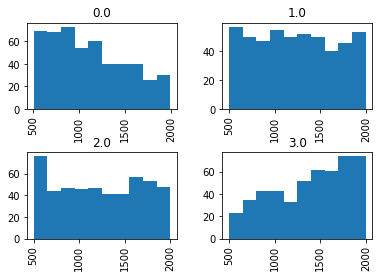

In [17]:
df['battery_power'].hist(by=df['price_range'])

Check if all phones that have 4G also have 3G (points 2)

In [18]:
(df[df['four_g'] == 1]['three_g'] == 1).all()

True

How many 4G phones do not have wifi and bluetooth? (points 2)

In [19]:
df[df['four_g'] == 1].groupby(['wifi', 'blue']).size() # 389 have both

wifi  blue
0     0       387
      1       385
1     0       369
      1       389
dtype: int64

In [20]:
## part 2

In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'id'],
      dtype='object')

You want to predict the value of price_range based on the attributes in the dataset. Split the dataset so that 3/4 of the elements are contained in a new dataset "train" and 1/4 in the dataset "test". To train the train with the model Decision Tree and to estimate the accuracy obtained calculated both on the train dataset and on the test dataset. Compare the obtained results with those obtained with a prediction based on the Logistic Regression model. Make some considerations on the results Make some considerations on the obtained results, taking into account also the confusion matrix analysis. (points 4)

In [22]:
df = df.loc[df['price_range'].notna()]

In [23]:
df.drop(['id'], axis=1, inplace=True)

In [24]:
y = df['price_range']
X = df.loc[:, df.columns != 'price_range']

In [25]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_pred)

In [29]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
acc_lr = accuracy_score(y_test, predictions)

/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[104,  18,   2,   0],
       [ 17,  63,  25,   5],
       [  0,  33,  58,  34],
       [  0,   2,  39, 100]])

2. Compare the accuracy obtained in the previous step with the accuracy obtained with a
10 Fold cross validation. (1 points)

In [31]:
from sklearn.model_selection import cross_val_score
cv_results_lr = cross_val_score(LogisticRegression(), X, y, cv=10, scoring="accuracy") # logistic regression
cv_results_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy") # decision tree

/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/hannah/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

In [32]:
cv_results_lr.mean()

0.6395000000000001

In [33]:
cv_results_dt.mean()

0.8354999999999999

Use the function of gridSearchCV to find the best parameters of the classifier decision tree. Act on the criterion, max_features and min_samples_split parameters. Check if the accuracy obtained with the new configuration exceeds the standard accuracy obtained in point 1 (point 4)

In [34]:
from sklearn.model_selection import GridSearchCV
import numpy as np

tree_param = [{'criterion': ['entropy', 'gini'], 
               'max_depth': np.arange(3, 15),
               'min_samples_split': np.arange(3, 15)}]

gs_clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5, scoring='accuracy')

gs_clf.fit(X_train, y_train)
gs_preds = gs_clf.predict(X_test)

gs_clf.best_params_

# Evaluate the model
score = accuracy_score(y_test, gs_preds)
print('Accuracy Score:', score)
print("Best score: ",gs_clf.best_score_)
print("Best params: ",gs_clf.best_params_)
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best estimator: ",gs_clf.best_estimator_)


Accuracy Score: 0.844
Best score:  0.8560000000000001
Best params:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 14}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=14)


Use the MaxAbsScaler function to scale the dataset values between 0 and 1 and compare if the accuracy obtained with the Decision Tree Classifier improves (steps 3).

In [35]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X)


In [36]:
transformer

MaxAbsScaler()

5. Discretize the ram value into 4 intervals and see if the accuracy obtained with the
Decision Tree Classifier improves (step 2).

In [37]:
df['ram'] = pd.cut(df["ram"],bins=4, labels=[0,1,2,3])

In [38]:
y = df['price_range']
X = df.loc[:, df.columns != 'price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc_dt_binned = accuracy_score(y_test, y_pred)

In [40]:
acc_dt_binned

0.764

6. Create a pipeline where the value of ram is discretized into 4 intervals, the value of
battery_power is discretized into 10 intervals and then the dataset is reduced to values in the range
in the range (0,1) and normalized with the Normalizer function. Then apply a model
DecisionTree. (points 4) [Alternative (points 2): do not apply discretization].

In [41]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [42]:
df['battery_power']

0        842
1       1021
2        563
3        615
4       1821
        ... 
1995     794
1996    1965
1997    1911
1998    1512
1999     510
Name: battery_power, Length: 2000, dtype: int64

In [45]:
from sklearn import preprocessing

df['battery_power'] = pd.cut(df['battery_power'],bins=10, labels=range(0,10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


TypeError: min() takes 1 positional argument but 2 were given

In [46]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
pipe = Pipeline([('normalizer', preprocessing.Normalizer()), 'tree', DecisionTreeClassifier()])

# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)   
#accurancy_score(y_test, pipe_pred)

TypeError: zip argument #3 must support iteration